In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.measure import label, regionprops, regionprops_table
from skimage.filters import threshold_otsu
from scipy.ndimage import median_filter
from matplotlib.patches import Rectangle
from tqdm import tqdm
from skimage.morphology import closing, square

In [41]:
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import erosion, dilation, opening, closing
from skimage.measure import label, regionprops
from skimage.color import label2rgb

In [42]:
%cd C:\Users\Admin\Desktop\ADS2001\molecules
%ls

C:\Users\Admin\Desktop\ADS2001\molecules
 Volume in drive C has no label.
 Volume Serial Number is C41A-3959

 Directory of C:\Users\Admin\Desktop\ADS2001\molecules

06/04/2022  08:31    <DIR>          .
24/05/2022  11:43    <DIR>          ..
06/04/2022  08:09         1,048,870 111_test_data.p
06/04/2022  08:09         3,512,004 1705_6.txt
06/04/2022  08:09         9,443,547 180509_18-16-48_SPM001.sxm
06/04/2022  08:09        16,782,073 Ag111_APT_007.sxm
06/04/2022  08:09        16,782,072 Ag111_APT_008.sxm
06/04/2022  08:10        16,782,076 Ag111_APT_009.sxm
06/04/2022  08:10        16,782,077 Ag111_APT_010.sxm
06/04/2022  08:10        10,490,787 Ag111_APT_111.sxm
06/04/2022  08:10         9,468,523 Ag111_APT_CO_044.p
06/04/2022  08:10        16,782,101 Ag111_APT_LL1s_UV9min_009.sxm
09/03/2022  08:37        50,336,746 Helicene_Ag(111)008.sxm
06/04/2022  08:11        16,782,086 Helicene_Ag(111)020.sxm
06/04/2022  08:11        16,782,087 Helicene_Ag(111)021.sxm
              13 File(s)

In [43]:
%cd Desktop
%ls

[WinError 2] The system cannot find the file specified: 'Desktop'
C:\Users\Admin\Desktop\ADS2001\molecules
 Volume in drive C has no label.
 Volume Serial Number is C41A-3959

 Directory of C:\Users\Admin\Desktop\ADS2001\molecules

06/04/2022  08:31    <DIR>          .
24/05/2022  11:43    <DIR>          ..
06/04/2022  08:09         1,048,870 111_test_data.p
06/04/2022  08:09         3,512,004 1705_6.txt
06/04/2022  08:09         9,443,547 180509_18-16-48_SPM001.sxm
06/04/2022  08:09        16,782,073 Ag111_APT_007.sxm
06/04/2022  08:09        16,782,072 Ag111_APT_008.sxm
06/04/2022  08:10        16,782,076 Ag111_APT_009.sxm
06/04/2022  08:10        16,782,077 Ag111_APT_010.sxm
06/04/2022  08:10        10,490,787 Ag111_APT_111.sxm
06/04/2022  08:10         9,468,523 Ag111_APT_CO_044.p
06/04/2022  08:10        16,782,101 Ag111_APT_LL1s_UV9min_009.sxm
09/03/2022  08:37        50,336,746 Helicene_Ag(111)008.sxm
06/04/2022  08:11        16,782,086 Helicene_Ag(111)020.sxm
06/04/2022  08:11 

In [44]:
%cd Christian\ Wackerlin
%pwd

[WinError 3] The system cannot find the path specified: 'Christian\\ Wackerlin'
C:\Users\Admin\Desktop\ADS2001\molecules


'C:\\Users\\Admin\\Desktop\\ADS2001\\molecules'

### Opening Image 1

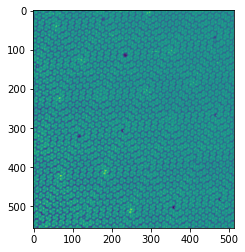

In [45]:
im1 = np.loadtxt('1705_6.txt')
plt.imshow(im1)

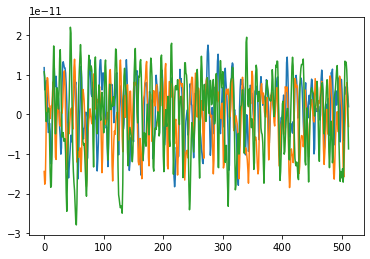

In [85]:
# show how the mean changes over differrent slices
plt.plot(im1[:][0])
plt.plot(im1[:][256])
plt.plot(im1[:][-1])

In [86]:
def image_mean_remove(image):
    '''removes the mean change in the field'''
    imslice = image
    ind1 = np.arange(imslice.shape[0])
    ind2 = np.arange(imslice.shape[1])
    xm = np.mean(imslice,axis=0)
    for ix in ind1:
        imslice[ix,:] = imslice[ix,:]-xm
    ym = np.mean(imslice,axis=1)
    for iy in ind2:
        imslice[:,iy] = imslice[:,iy]-ym
    return imslice

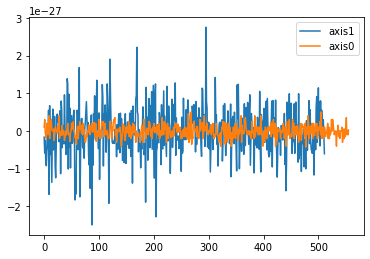

In [88]:
# remove the mean change from the image
imslice = image_mean_remove(im1)

ym = np.mean(imslice,axis=1)
xm = np.mean(imslice,axis=0)
plt.plot(np.arange(imslice.shape[1]),xm,label='axis1')
plt.plot(np.arange(imslice.shape[0]),ym,label='axis0')
plt.legend()

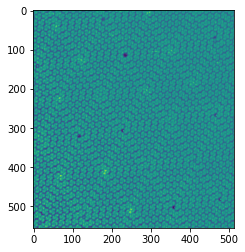

In [89]:
plt.imshow(im1)

In [90]:
from skimage import segmentation
from skimage import filters

mask = im1 > filters.threshold_otsu(im1)
# mask = imslice > imslice.mean()
clean_border = segmentation.clear_border(mask)
imslice_edges = segmentation.mark_boundaries(im1, clean_border.astype(np.int))

<ipython-input-90-c2646801cf8c>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  imslice_edges = segmentation.mark_boundaries(im1, clean_border.astype(np.int))


<ipython-input-91-7bbf8605e44a>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image= rgb2gray(im1[0:256,0:256])


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

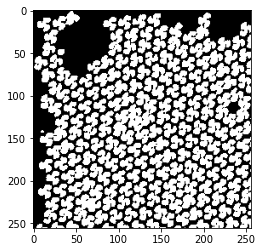

In [91]:
image= rgb2gray(im1[0:256,0:256])
image_gray1= plt.imshow(clean_border[0:256,0:256], cmap='gray')
thresh = threshold_otsu(im1)
bw = closing(im1 > thresh, square(3))
bw

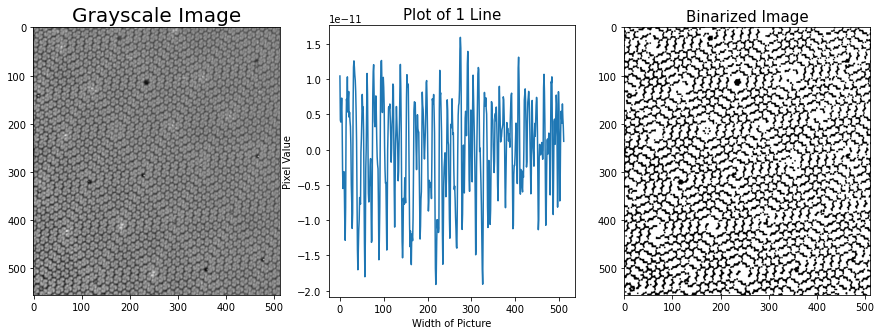

In [92]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sample_b = im1 > 0.6
ax[0].set_title('Grayscale Image',fontsize=20)
ax[0].imshow(im1,cmap='gray')
ax[1].plot(im1[0])
ax[1].set_ylabel('Pixel Value')
ax[1].set_xlabel('Width of Picture')
ax[1].set_title('Plot of 1 Line',fontsize=15)
ax[2].set_title('Binarized Image',fontsize=15)
ax[2].imshow(bw,cmap='gray')

### Opening Image 2

In [49]:
import nanonispy as nap

In [50]:
%cd ../Hellerstedt\ APT

[WinError 3] The system cannot find the path specified: '../Hellerstedt\\ APT'
C:\Users\Admin\Desktop\ADS2001\molecules


In [51]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is C41A-3959

 Directory of C:\Users\Admin\Desktop\ADS2001\molecules

06/04/2022  08:31    <DIR>          .
24/05/2022  11:43    <DIR>          ..
06/04/2022  08:09         1,048,870 111_test_data.p
06/04/2022  08:09         3,512,004 1705_6.txt
06/04/2022  08:09         9,443,547 180509_18-16-48_SPM001.sxm
06/04/2022  08:09        16,782,073 Ag111_APT_007.sxm
06/04/2022  08:09        16,782,072 Ag111_APT_008.sxm
06/04/2022  08:10        16,782,076 Ag111_APT_009.sxm
06/04/2022  08:10        16,782,077 Ag111_APT_010.sxm
06/04/2022  08:10        10,490,787 Ag111_APT_111.sxm
06/04/2022  08:10         9,468,523 Ag111_APT_CO_044.p
06/04/2022  08:10        16,782,101 Ag111_APT_LL1s_UV9min_009.sxm
09/03/2022  08:37        50,336,746 Helicene_Ag(111)008.sxm
06/04/2022  08:11        16,782,086 Helicene_Ag(111)020.sxm
06/04/2022  08:11        16,782,087 Helicene_Ag(111)021.sxm
              13 File(s)    201,775,049 bytes
               2 Di

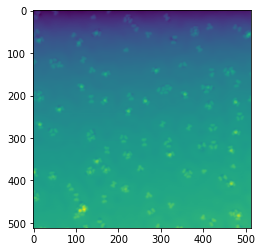

In [52]:
import pickle
d = pickle.load(open('111_test_data.p','rb'))
im2 =  d['image']
rescale = d['rescale']
plt.imshow(im2)

In [53]:
mask = im2 > filters.threshold_otsu(im2)
# mask = imslice > imslice.mean()
clean_border = segmentation.clear_border(mask)
imslice_edges = segmentation.mark_boundaries(im2, clean_border.astype(np.int))

<ipython-input-53-b3a47e87ff31>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  imslice_edges = segmentation.mark_boundaries(im2, clean_border.astype(np.int))


<ipython-input-54-e3d45ea8d8c1>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image= rgb2gray(im2[0:256,0:256])


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

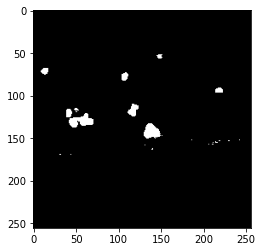

In [54]:
image= rgb2gray(im2[0:256,0:256])
image_gray1= plt.imshow(clean_border[0:256,0:256], cmap='gray')
thresh = threshold_otsu(im2)
bw2 = closing(im2 > thresh, square(3))
bw2

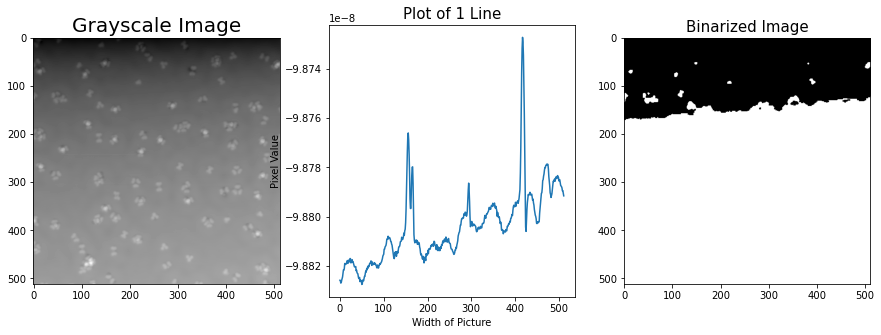

In [55]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sample_b = im2 > 0.6
ax[0].set_title('Grayscale Image',fontsize=20)
ax[0].imshow(im2,cmap='gray')
ax[1].plot(im2[500])
ax[1].set_ylabel('Pixel Value')
ax[1].set_xlabel('Width of Picture')
ax[1].set_title('Plot of 1 Line',fontsize=15)
ax[2].set_title('Binarized Image',fontsize=15)
ax[2].imshow(bw2,cmap='gray')

### Opening image 3

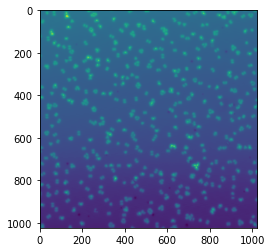

In [56]:
scan = nap.read.Scan('Ag111_APT_007.sxm')

im3 = scan.signals['Z']['forward']

if scan.header['scan_dir'] == 'down':
    im3 = np.flipud(im3)

im3[np.isnan(im3)] = np.mean(im3[~np.isnan(im3)])

plt.imshow(im3)

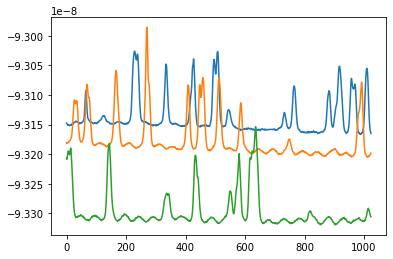

In [57]:
plt.plot(im3[:][0])
plt.plot(im3[:][256])
plt.plot(im3[:][-1])

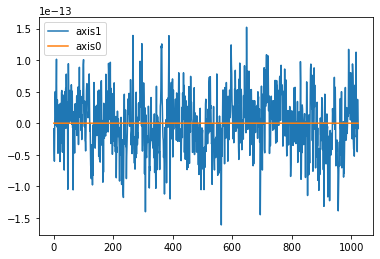

In [58]:
imslice = im3
ind1 = np.arange(imslice.shape[0])
ind2 = np.arange(imslice.shape[1])
xm = np.mean(imslice,axis=0)
for ix in ind1:
    imslice[ix,:] = imslice[ix,:]-xm
ym = np.mean(imslice,axis=1)
for iy in ind2:
    imslice[:,iy] = imslice[:,iy]-ym
    
ym = np.mean(imslice,axis=1)
xm = np.mean(imslice,axis=0)
plt.plot(ind2,xm,label='axis1')
plt.plot(ind1,ym,label='axis0')
plt.legend()

In [78]:
mask = im3 > filters.threshold_otsu(im3)
# mask = imslice > imslice.mean()
clean_border = segmentation.clear_border(mask)
imslice_edges = segmentation.mark_boundaries(im3, clean_border.astype(np.int))

<ipython-input-78-7f7125420a0c>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  imslice_edges = segmentation.mark_boundaries(im3, clean_border.astype(np.int))


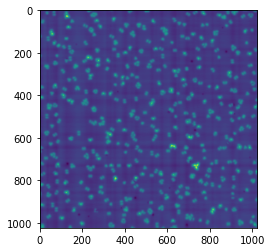

In [84]:
plt.imshow(im3)

<ipython-input-79-90d05f604211>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image1= rgb2gray(im3[0:256,0:256])


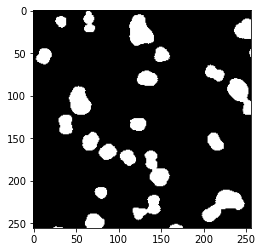

In [79]:
image1= rgb2gray(im3[0:256,0:256])
image_gray12= plt.imshow(clean_border[0:256,0:256], cmap='gray')
thresh1 = threshold_otsu(im3)
bw3 = closing(im3 > thresh, square(3))


<ipython-input-61-9983188559c2>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  ix= rgb2gray(imslice[0:256,0:256])


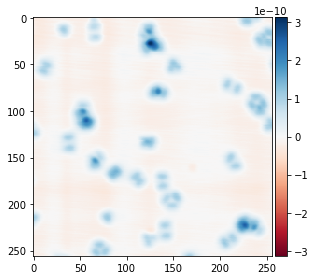

In [61]:
ix= rgb2gray(imslice[0:256,0:256])
imshow(ix)
ix_bw = ix<0.8

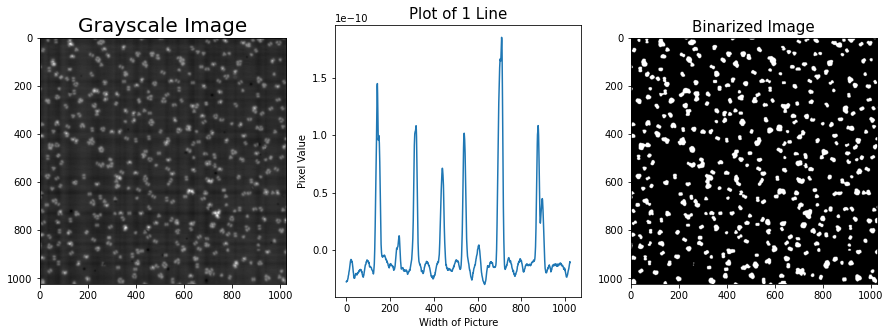

In [81]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sample_b = im3 > 0.6
ax[0].set_title('Grayscale Image',fontsize=20)
ax[0].imshow(im3,cmap='gray')
ax[1].plot(im3[600])
ax[1].set_ylabel('Pixel Value')
ax[1].set_xlabel('Width of Picture')
ax[1].set_title('Plot of 1 Line',fontsize=15)
ax[2].set_title('Binarized Image',fontsize=15)
ax[2].imshow(bw3,cmap='gray')

### Opening image 4

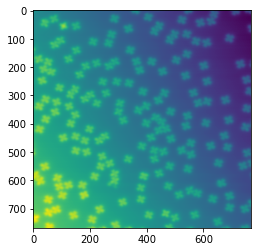

In [63]:
scan = nap.read.Scan('180509_18-16-48_SPM001.sxm')

im4 = scan.signals['Z']['forward']

if scan.header['scan_dir'] == 'down':
    im4 = np.flipud(im4)

im4[np.isnan(im4)] = np.mean(im4[~np.isnan(im4)])

plt.imshow(im4)

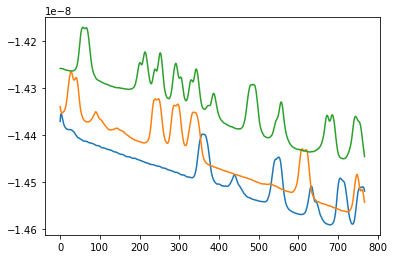

In [64]:
plt.plot(im4[:][0])
plt.plot(im4[:][256])
plt.plot(im4[:][-1])

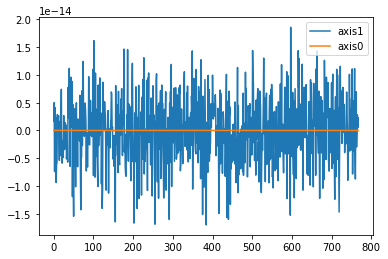

In [65]:
imslice = im4
ind1 = np.arange(imslice.shape[0])
ind2 = np.arange(imslice.shape[1])
xm = np.mean(imslice,axis=0)
for ix in ind1:
    imslice[ix,:] = imslice[ix,:]-xm
ym = np.mean(imslice,axis=1)
for iy in ind2:
    imslice[:,iy] = imslice[:,iy]-ym
    
ym = np.mean(imslice,axis=1)
xm = np.mean(imslice,axis=0)
plt.plot(ind2,xm,label='axis1')
plt.plot(ind1,ym,label='axis0')
plt.legend()

In [66]:
mask = im4 > filters.threshold_otsu(im4)
# mask = imslice > imslice.mean()
clean_border = segmentation.clear_border(mask)
imslice_edges = segmentation.mark_boundaries(im4, clean_border.astype(np.int))

<ipython-input-66-e4cea655bfb5>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  imslice_edges = segmentation.mark_boundaries(im4, clean_border.astype(np.int))


<ipython-input-67-d85d4780f782>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image= rgb2gray(im4[0:256,0:256])


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

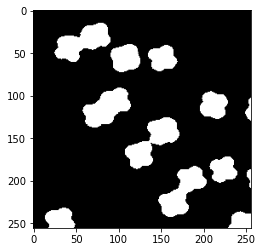

In [67]:
image= rgb2gray(im4[0:256,0:256])
image_gray1= plt.imshow(clean_border[0:256,0:256], cmap='gray')
thresh = threshold_otsu(im4)
bw4 = closing(im4> thresh, square(3))
bw4

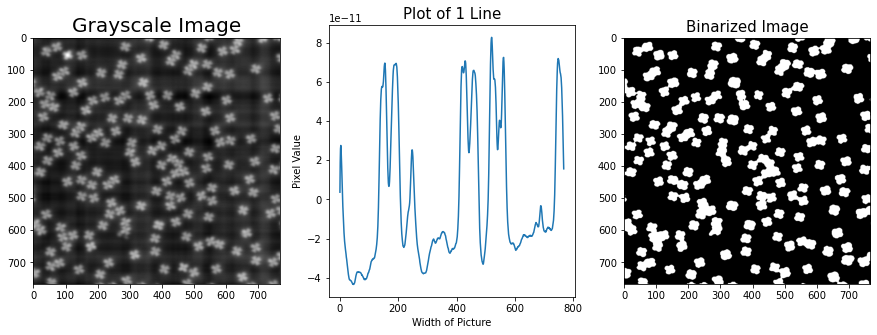

In [68]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sample_b = im4 > 0.5
ax[0].set_title('Grayscale Image',fontsize=20)
ax[0].imshow(im4,cmap='gray')
ax[1].plot(im4[500])
ax[1].set_ylabel('Pixel Value')
ax[1].set_xlabel('Width of Picture')
ax[1].set_title('Plot of 1 Line',fontsize=15)
ax[2].set_title('Binarized Image',fontsize=15)
ax[2].imshow(bw4,cmap='gray')

## Difference of Gaussian

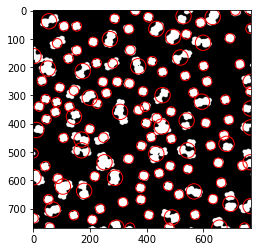

In [83]:
# the difference of the gausssian
blobs = blob_dog(bw4, max_sigma=30, min_sigma =12, threshold=0.3, overlap = 0.3)
fig, ax = plt.subplots()
ax.imshow(bw4, cmap='gray')
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', fill=False))